## IMPORTING THE LIBRARIES

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## IMPORTING THE DATA SET

In [34]:
data=pd.read_csv(r"C:\Users\hp\Documents\PROJECT FILES\PRCP-1027-Skin Disorder Detetction\dataset_35_dermatology.csv")

# TASK 3 : - CREATE A MACHINE LEARNING MODEL TO DO PREDICTION.

## DATA PREPROCCESSING

### CHECKING NULL VALUES

In [35]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

* DATASET HAS NO NULL VALUES PRESENT IN IT

### HANDLING CORRUPT DATA

In [36]:
data.loc[data['Age']=="?","Age"]=0

In [37]:
data[["Age"]]=data[["Age"]].astype("int64")

In [38]:
data.loc[data["Age"]==0,"Age"]=data["Age"].median()

* Here it can be seen that Age has corrupt data in it 

* We need not to worry about Age column because it is unique column we donot need this in our model creation , so we will drop it in Feature Selection part

## FEATURE SELECTION

### CHECKING THE HIGHLY CO-RELATED FEATURES

<AxesSubplot:>

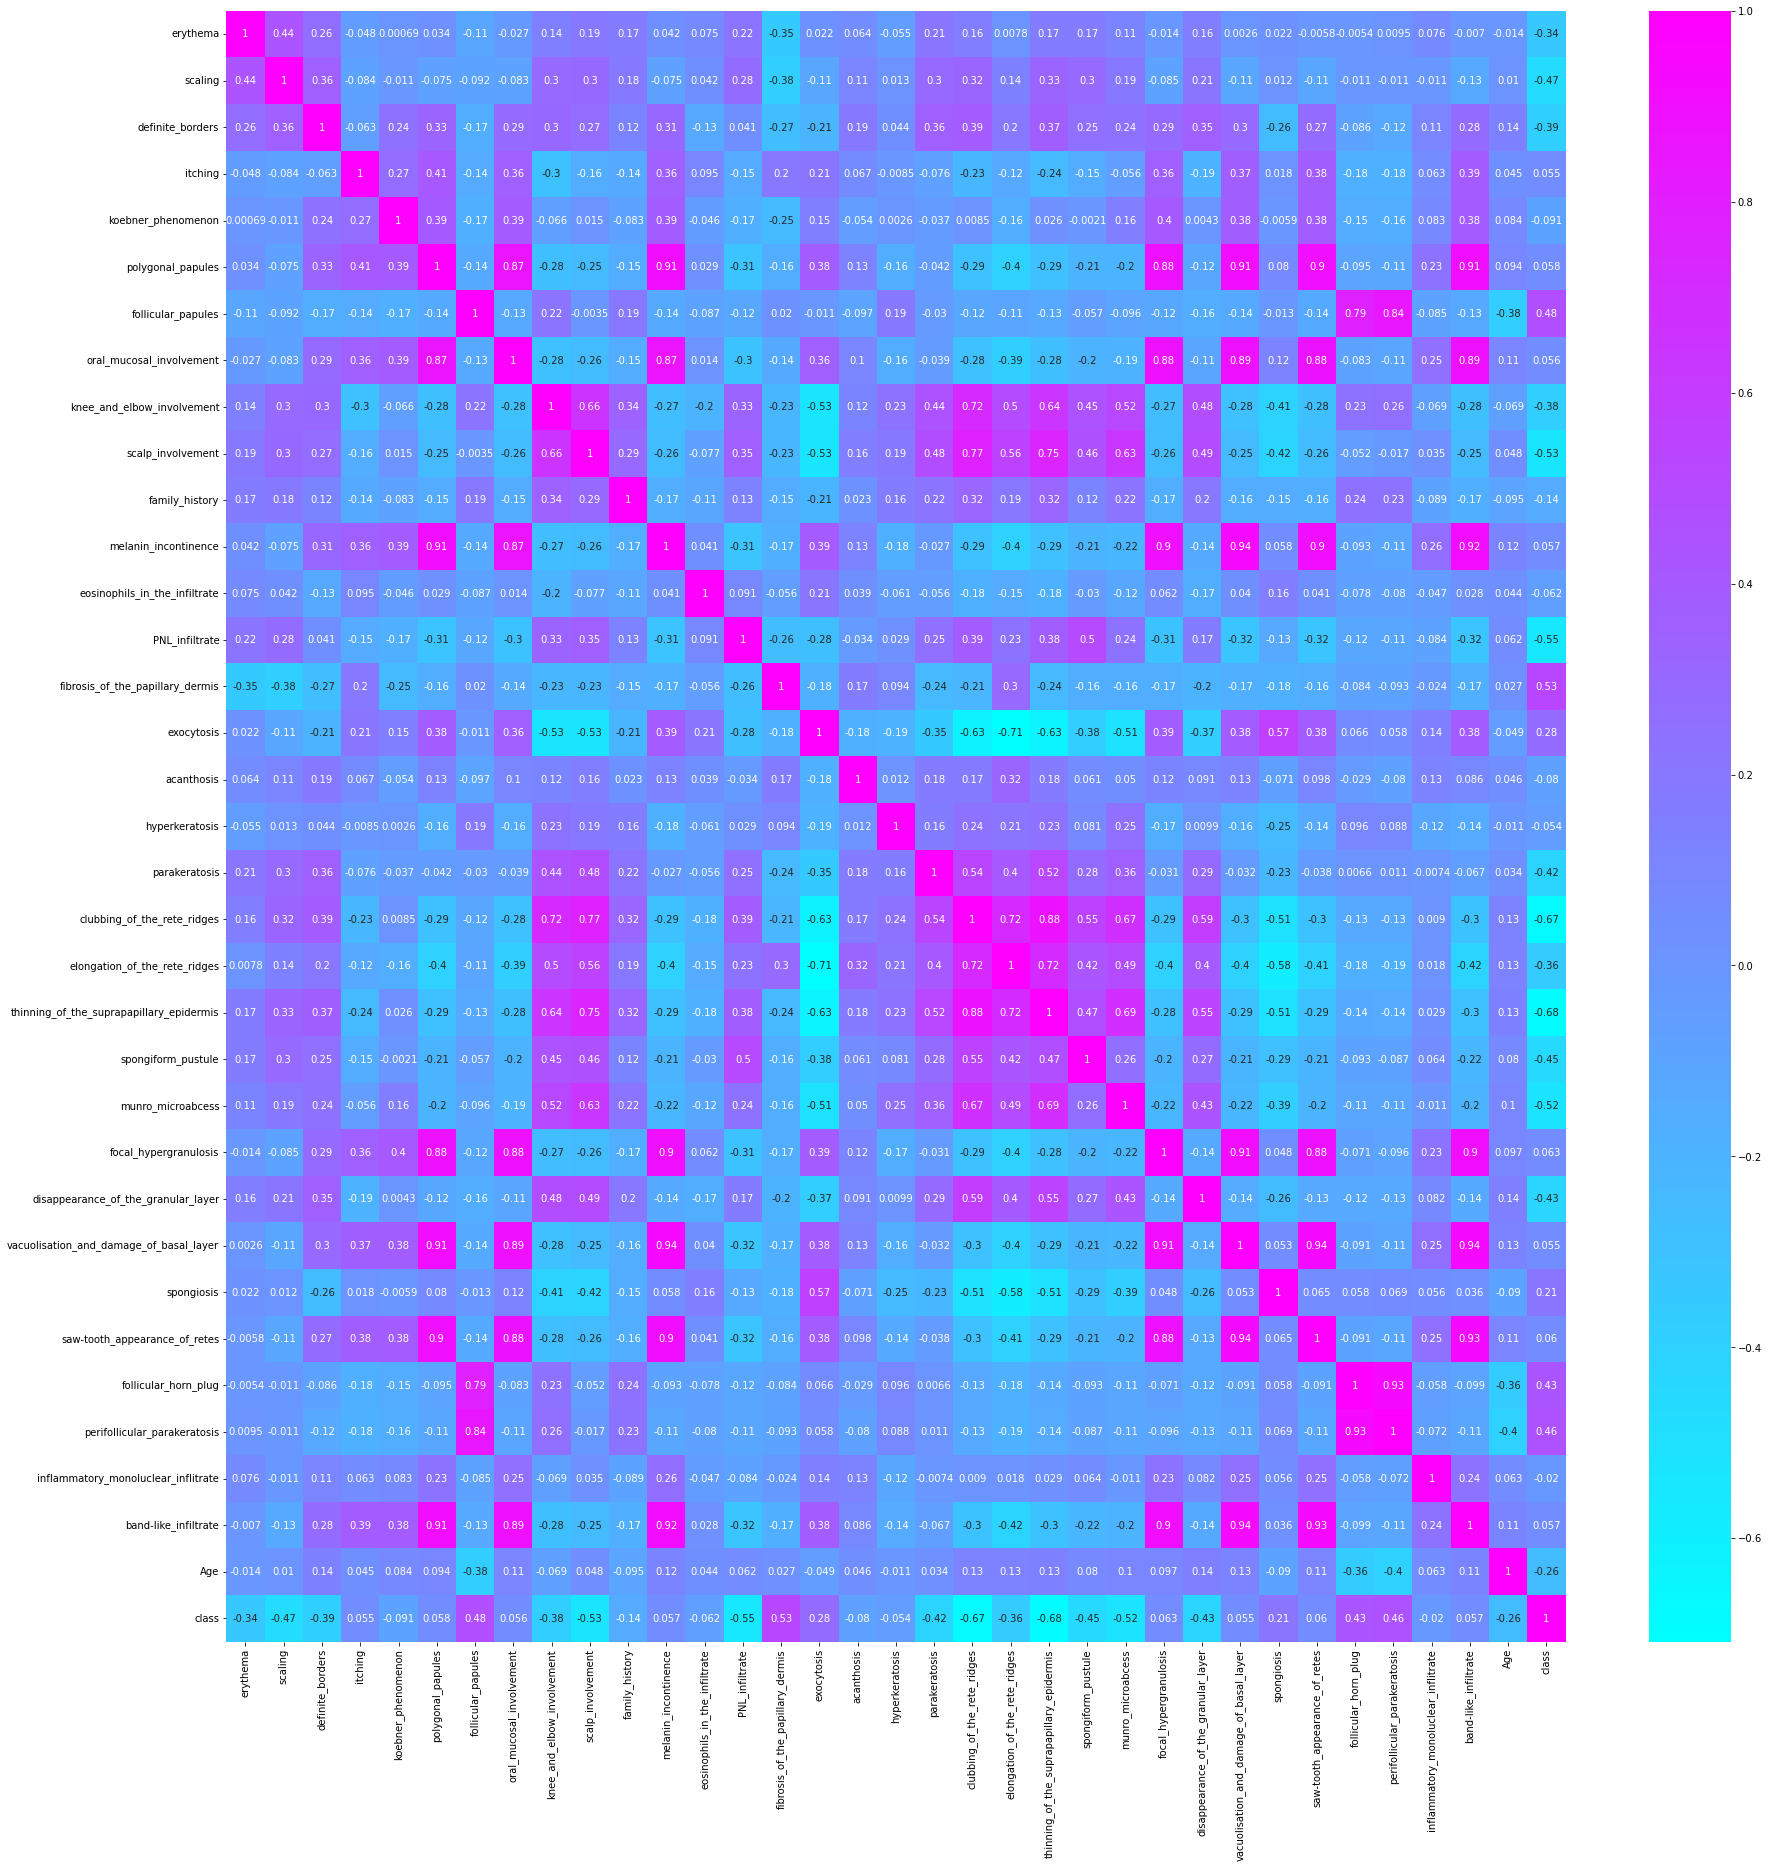

In [39]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),cmap="cool",annot=True)

### DROPPING UNIQUE FEATURES AND HIGHLY CO-RELATED FEATURES

In [40]:
data.drop(['polygonal_papules','melanin_incontinence',
           'focal_hypergranulosis','vacuolisation_and_damage_of_basal_layer',
           'saw-tooth_appearance_of_retes','band-like_infiltrate'],axis=1,inplace=True)

### MODEL CREATION

In [41]:
x=data.drop(["class"],axis=1)
y=data["class"]

### BALANCING THE DATA

In [42]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print("unbalanced data:  ",Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data:   Counter({1: 112, 3: 72, 2: 61, 5: 52, 4: 49, 6: 20})
balanced data:    : Counter({2: 112, 1: 112, 3: 112, 5: 112, 4: 112, 6: 112})


### TRAIN-TEST-SPLIT

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,random_state=42,test_size=0.25)

### MODEL BUILDING

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

### CHECKING WHETHER DATA IS FULLY TRAINED OR NOT

In [45]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
y_pred=dt.predict(x_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        81
           5       1.00      1.00      1.00        89
           6       1.00      1.00      1.00        80

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



* A s from classification report given above we can conclude that this model is fit for this data because it is 100%training the data.
* Hence we can move further with this algorithm and do pridiction on our data.

### PREDICTION

In [46]:
y_pred=dt.predict(x_test)
y_pred

array([4, 2, 4, 6, 1, 4, 1, 2, 5, 2, 3, 5, 5, 4, 1, 1, 5, 6, 5, 3, 1, 6,
       2, 5, 6, 4, 4, 6, 3, 2, 3, 6, 6, 1, 4, 5, 3, 3, 1, 6, 6, 1, 2, 2,
       5, 4, 6, 4, 1, 4, 6, 4, 1, 5, 3, 6, 5, 1, 1, 2, 2, 3, 3, 1, 4, 6,
       6, 3, 6, 5, 1, 1, 1, 2, 5, 2, 5, 1, 4, 6, 3, 1, 5, 3, 6, 3, 4, 2,
       1, 4, 4, 5, 6, 6, 1, 3, 1, 4, 1, 6, 1, 4, 4, 4, 6, 4, 4, 2, 3, 3,
       3, 2, 1, 4, 2, 3, 4, 3, 5, 1, 3, 5, 6, 4, 1, 2, 2, 4, 6, 5, 3, 5,
       3, 4, 1, 4, 6, 1, 3, 5, 3, 6, 4, 3, 6, 2, 3, 3, 5, 3, 1, 6, 2, 1,
       6, 6, 6, 5, 4, 3, 2, 2, 3, 6, 6, 4, 5, 3], dtype=int64)

### CHECKING CLASSIFICATION REPORT OF PROJECT

In [47]:
 from sklearn.metrics import classification_report,accuracy_score,f1_score

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.90      0.90      0.90        21
           3       0.94      0.97      0.95        30
           4       0.97      0.97      0.97        31
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        32

    accuracy                           0.97       168
   macro avg       0.97      0.97      0.97       168
weighted avg       0.97      0.97      0.97       168



### USING RANDOM FOREST ENSEMBLE TECHNIQUE IN ORDER TO IMPROVE THE MODEL RATING

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc=RandomForestClassifier(n_estimators=400)

In [51]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400)

In [52]:
y_prediction=rfc.predict(x_test)

# FINAL REPORT

In [53]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.91      1.00      0.95        21
           3       1.00      0.97      0.98        30
           4       1.00      0.97      0.98        31
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        32

    accuracy                           0.99       168
   macro avg       0.99      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168



# CONCLUSION

* HENCE WE CREATED A SUCCESSFULL MODEL WITH 99% ACCURACY.
* IN THIS PROJECT WE HAVE TO MORE FOCUS ON F1-SCORE AND THATS ALSO COMMING GOOD
* AS WE CAN CONCLUDE FROM OUR ACCURACY THAT OUR MODEL IS DOING 99% OF PREDICTION.